<a href="https://colab.research.google.com/github/AgungSt01/DataMining/blob/main/notebook/eda_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA ( Exploratory Data Analysis )
## Pertemuan ke-4 Mata Kuliah Data Mining
### dibuat oleh : Asep Muhidin, S.Kom., M.Kom.

## Loading & Preprocessing Data ( Flashback pertemuan 2&3)

In [1]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/asepmuhidin/MK-Data-Mining-UPB/main/dataset/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
#Hapus kolom yang unik nilainya
df.drop(columns=['PassengerId'], inplace=True)

In [3]:
#Cek duplikasi data
df.duplicated().sum()

0

In [4]:
#Jika ada data dupilkasi,maka dihapus
df.drop_duplicates(inplace=True)

In [5]:
#Cek Data yang missing value/kosong/null/NA/NaN
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [6]:
#Cek baris yang nilai Age nya kosong/NaN
df[df.Age.isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [7]:
#Jika missing value pada kolom lebih besar  50% dari data, maka hapus
df.drop(columns=['Cabin'], inplace=True)

In [8]:
#Isi data kosong dengan nilai median data Age
df.Age.fillna(df.Age.median(), inplace=True)

In [9]:
#Cek baris yang nilai Embarked nya kosong/NaN
df[df.Embarked.isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [10]:
#Cek nilai yang sering muncul pada kolom Embarked
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
#Isi data kosong dengan nilai 'S' data Embarked
df.Embarked.fillna('S', inplace=True)
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

## Data Decriptions

In [12]:
## Statistic descriptif
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Selecting & Filtering Data

### Select single, multiple coloumns and rows

In [13]:
#Memilih 1 kolom( menghasilkan data series)
name=df['Name']    #atau dengan df.Name
name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

### Tugas-1: Tampilkan data Survived. simpan dalam variabel y

In [39]:
# Tugas-1: Tampilkan data Survived. simpan dalam variabel y
y=df['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [15]:
#Memilih 2 atau lebih kolom
bio=df[['Name','Sex']]
bio

,Name,Sex
0,"Braund, Mr. Owen Harris",male
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
2,"Heikkinen, Miss. Laina",female
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
4,"Allen, Mr. William Henry",male
...,...,...
886,"Montvila, Rev. Juozas",male
887,"Graham, Miss. Margaret Edith",female
888,"Johnston, Miss. Catherine Helen ""Carrie""",female
889,"Behr, Mr. Karl Howell",male


### Tugas-2: Tampilkan data Name, Age, Sex, SibSp. simpan dalam variabel X

In [40]:
# Tugas-2: Tampilkan data Name, Age, Sex, SibSp. simpan dalam variabel X
X=df[['Name','Age','Sex','SibSp']]
X

,Name,Age,Sex,SibSp
0,"Braund, Mr. Owen Harris",22.0,male,1
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,female,1
2,"Heikkinen, Miss. Laina",26.0,female,0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,female,1
4,"Allen, Mr. William Henry",35.0,male,0
...,...,...,...,...
886,"Montvila, Rev. Juozas",27.0,male,0
887,"Graham, Miss. Margaret Edith",19.0,female,0
888,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,female,1
889,"Behr, Mr. Karl Howell",26.0,male,0


In [17]:
#Menampilkan data baris, menggunakan loc
df.loc[0:2] #Menampilkan baris index 0 sd 2

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


### Tugas-3 : Tampilkan data dari baris ke 10 sd 15

In [41]:
#Tugas-3 : Tampilkan data dari baris ke 10 sd 15
df.loc[10:15]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
10,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S
11,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S
12,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,S
13,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,S
14,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,S
15,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,S


In [19]:
df.loc[1:3,'Name':'Age'] #Menampilkan baris index 1 sd 3 dengan kolom Name sd Age

,Name,Sex,Age
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,"Heikkinen, Miss. Laina",female,26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0


### Tugas-4 : Tampilkan data dari baris ke 10 sd 15 dengan kolom Name s.d Fare

In [42]:
#Tugas-4 : Tampilkan data dari baris ke 10 sd 15 dengan kolom Name s.d Fare
df.loc[10:15,'Name':'Fare']

,Name,Sex,Age,SibSp,Parch,Ticket,Fare
10,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000
11,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500
12,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500
13,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750
14,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542
15,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000


In [21]:
df.loc[1:3,['Name','Age','SibSp']] # Menampilkan baris index 1 sd 4 dan kolom Name sd Age


,Name,Age,SibSp
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1
2,"Heikkinen, Miss. Laina",26.0,0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1


### Tugas-5 : Tampilkan data dari baris ke 10 sd 15, hanya untuk kolom Age,Sex,Fare

In [43]:
#Tugas-5 : Tampilkan data dari baris ke 10 sd 15, hanya untuk kolom Age,Sex,Fare
df.loc[10:15,['Age','Sex','Fare']]

,Age,Sex,Fare
10,4.0,female,16.7000
11,58.0,female,26.5500
12,20.0,male,8.0500
13,39.0,male,31.2750
14,14.0,female,7.8542
15,55.0,female,16.0000


In [45]:
df.loc[[2,3,4],['Name','Age','Sex']]

,Name,Age,Sex
2,"Heikkinen, Miss. Laina",26.0,female
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,female
4,"Allen, Mr. William Henry",35.0,male


### Filtering Data

In [23]:
#Menampilkan data dengan kode keberangkatan (Embarked) adalah 'Q'
df[df['Embarked']=='Q']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
16,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,Q
22,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,Q
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,28.0,0,0,330959,7.8792,Q
32,1,3,"Glynn, Miss. Mary Agatha",female,28.0,0,0,335677,7.7500,Q
...,...,...,...,...,...,...,...,...,...,...
790,0,3,"Keane, Mr. Andrew ""Andy""",male,28.0,0,0,12460,7.7500,Q
825,0,3,"Flynn, Mr. John",male,28.0,0,0,368323,6.9500,Q
828,1,3,"McCormack, Mr. Thomas Joseph",male,28.0,0,0,367228,7.7500,Q
885,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q


### Tugas-6 : Tampilkan data penumpang yang berumur lebih dari 40 tahun

In [48]:
# Tugas-6 : Tampilkan data penumpang yang berumur lebih dari 40 tahun
df[df['Age']>40]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
11,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S
15,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,S
33,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,S
35,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,S
...,...,...,...,...,...,...,...,...,...,...
862,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,S
865,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,S
871,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,S
873,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,S


In [25]:
#Menampilkan data kode Embarked 'C' dan Sex adalah 'male'
df[(df['Embarked']=='C') & (df['Sex']=='male') ]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
26,0,3,"Emir, Mr. Farred Chehab",male,28.0,0,0,2631,7.2250,C
30,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,C
34,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,C
36,1,3,"Mamee, Mr. Hanna",male,28.0,0,0,2677,7.2292,C
42,0,3,"Kraeff, Mr. Theodor",male,28.0,0,0,349253,7.8958,C
...,...,...,...,...,...,...,...,...,...,...
839,1,1,"Marechal, Mr. Pierre",male,28.0,0,0,11774,29.7000,C
843,0,3,"Lemberopolous, Mr. Peter L",male,34.5,0,0,2683,6.4375,C
847,0,3,"Markoff, Mr. Marin",male,35.0,0,0,349213,7.8958,C
859,0,3,"Razi, Mr. Raihed",male,28.0,0,0,2629,7.2292,C


### Tugas-7 : Tampilkan data penumpang yang berumur lebih dari 40 tahun dan status Sex adalah 'female'

In [49]:
#Tugas-7 : Tampilkan data penumpang yang berumur lebih dari 40 tahun dan status Sex adalah 'female'
df[(df['Age']>40) & (df['Sex']=='female') ]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
11,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S
15,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,S
52,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,C
132,0,3,"Robins, Mrs. Alexander A (Grace Charity Laury)",female,47.0,1,0,A/5. 3337,14.5000,S
167,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9000,S
177,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C
194,1,1,"Brown, Mrs. James Joseph (Margaret Tobin)",female,44.0,0,0,PC 17610,27.7208,C
195,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,C
254,0,3,"Rosblom, Mrs. Viktor (Helena Wilhelmina)",female,41.0,0,2,370129,20.2125,S
259,1,2,"Parrish, Mrs. (Lutie Davis)",female,50.0,0,1,230433,26.0000,S


In [27]:
#Menampilkan data Name dan Sex hanya untuk Sex='male'
df[df['Sex']=='male'][['Name','Sex']]

,Name,Sex
0,"Braund, Mr. Owen Harris",male
4,"Allen, Mr. William Henry",male
5,"Moran, Mr. James",male
6,"McCarthy, Mr. Timothy J",male
7,"Palsson, Master. Gosta Leonard",male
...,...,...
883,"Banfield, Mr. Frederick James",male
884,"Sutehall, Mr. Henry Jr",male
886,"Montvila, Rev. Juozas",male
889,"Behr, Mr. Karl Howell",male


### Tugas-8 : Tampilkan data Name,Age yang berumur lebih dari 40 tahun


In [51]:
# Tugas-8 : Tampilkan data Name,Age yang berumur lebih dari 40 tahun
df[df['Age']>40][['Name','Age']]

,Name,Age
6,"McCarthy, Mr. Timothy J",54.0
11,"Bonnell, Miss. Elizabeth",58.0
15,"Hewlett, Mrs. (Mary D Kingcome)",55.0
33,"Wheadon, Mr. Edward H",66.0
35,"Holverson, Mr. Alexander Oskar",42.0
...,...,...
862,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",48.0
865,"Bystrom, Mrs. (Karolina)",42.0
871,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",47.0
873,"Vander Cruyssen, Mr. Victor",47.0


## Chart

## Splitting numerical and categorical data type (Flashback pertemuan ke-2)

In [29]:
df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,891
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,646
mean,0.383838,2.308642,NaN,NaN,29.361582,0.523008,0.381594,NaN,32.204208,NaN
std,0.486592,0.836071,NaN,NaN,13.019697,1.102743,0.806057,NaN,49.693429,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN
25%,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN
75%,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN


In [30]:
numerical_cols=['Age','SibSp','Parch','Fare']
categorical_cols=['Pclass','Sex','Embarked']

### Numeric data type chart
https://seaborn.pydata.org/generated/seaborn.displot.html

In [31]:
#import library seaborn dan matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

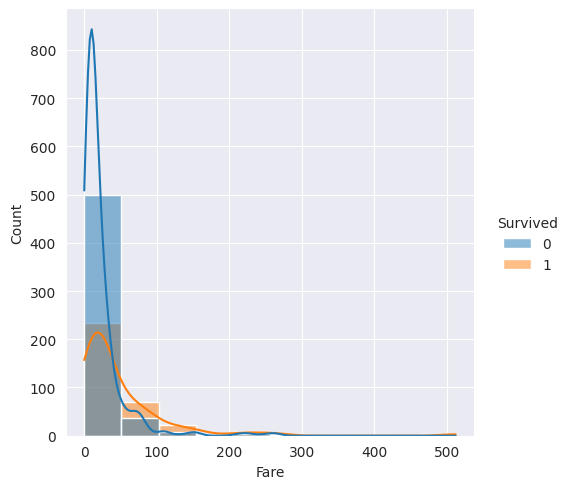

In [53]:
#Menampilkan distribusi data fare
sns.displot(data= df, x= 'Fare',bins=10, kde=True, hue='Survived')

In [54]:
df[df.Fare>=500]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
258,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
679,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C
737,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C


### Tugas-8 : Tampilkan grafik data Age dan jelaskan informasi yang ada di grafik

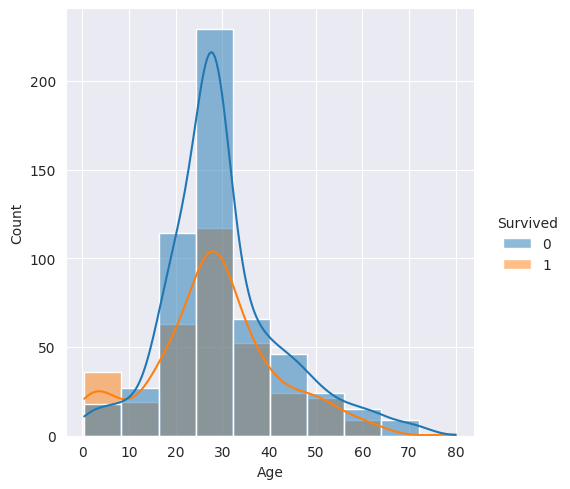

In [55]:
# Tugas-8 : Tampilkan chart  data Age
sns.displot(data= df, x= 'Age',bins=10, kde=True, hue='Survived')

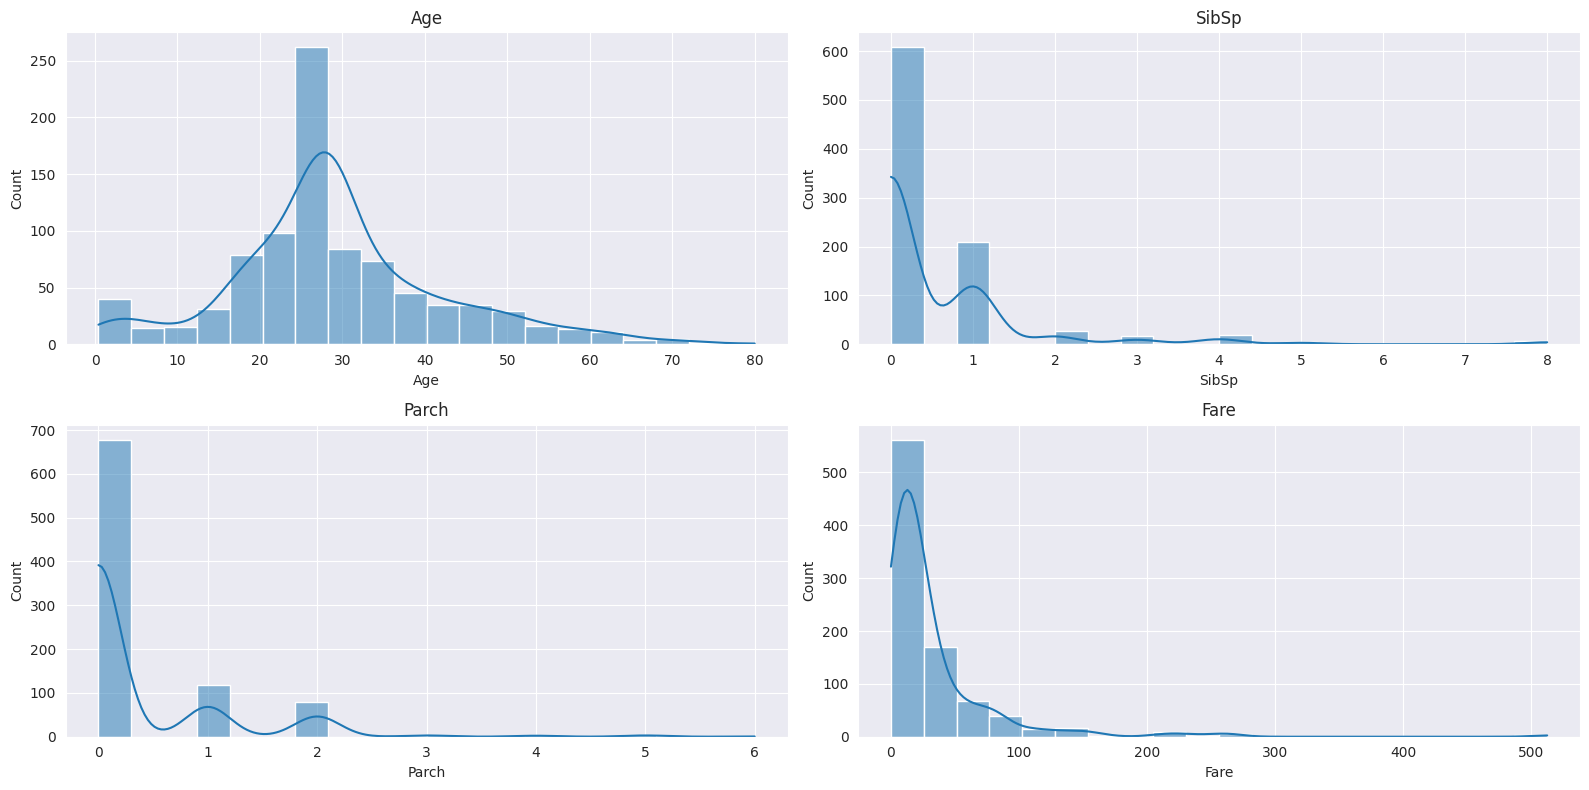

In [34]:
# Membuat chart semua data numeric
fig,axs=plt.subplots(2,2, figsize=(16,8))
for col,ax in zip(numerical_cols,axs.flatten()):
  ax.set_title(col)
  sns.histplot(data= df, x= col,bins=20,kde=True, ax=ax)

plt.tight_layout()

### Categorical data type chart
https://seaborn.pydata.org/generated/seaborn.countplot.html

<Axes: xlabel='Sex', ylabel='count'>

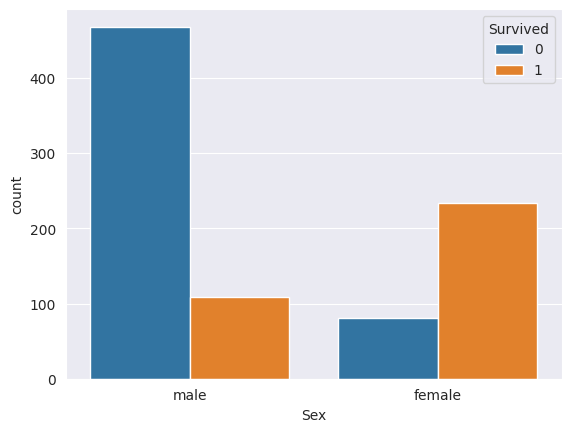

In [56]:
#Menampilkan grafik data Sex
sns.countplot(data= df, x= 'Sex',hue='Survived')

### Tugas-9 : Tampilkan grafik data Embarked dan jelaskan informasi yang ada di grafik

<Axes: xlabel='Embarked', ylabel='count'>

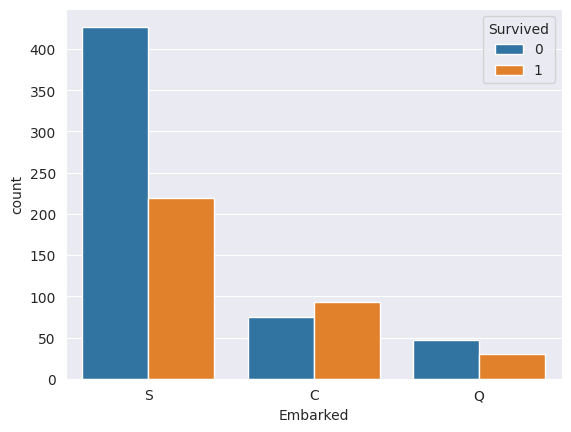

In [59]:
#Tugas-9 : Tampilkan grafik data Embarked dan jelaskan informasi yang ada di grafik
sns.countplot(data= df, x= 'Embarked',hue='Survived')

### Tugas-10 : Tampilkan grafik untuk semua data kategori dan jelaskan informasi yang ada di grafik

In [37]:
# Tugas-10 : Tampilkan grafik untuk semua data kategori dan jelaskan informasi yang ada di grafik

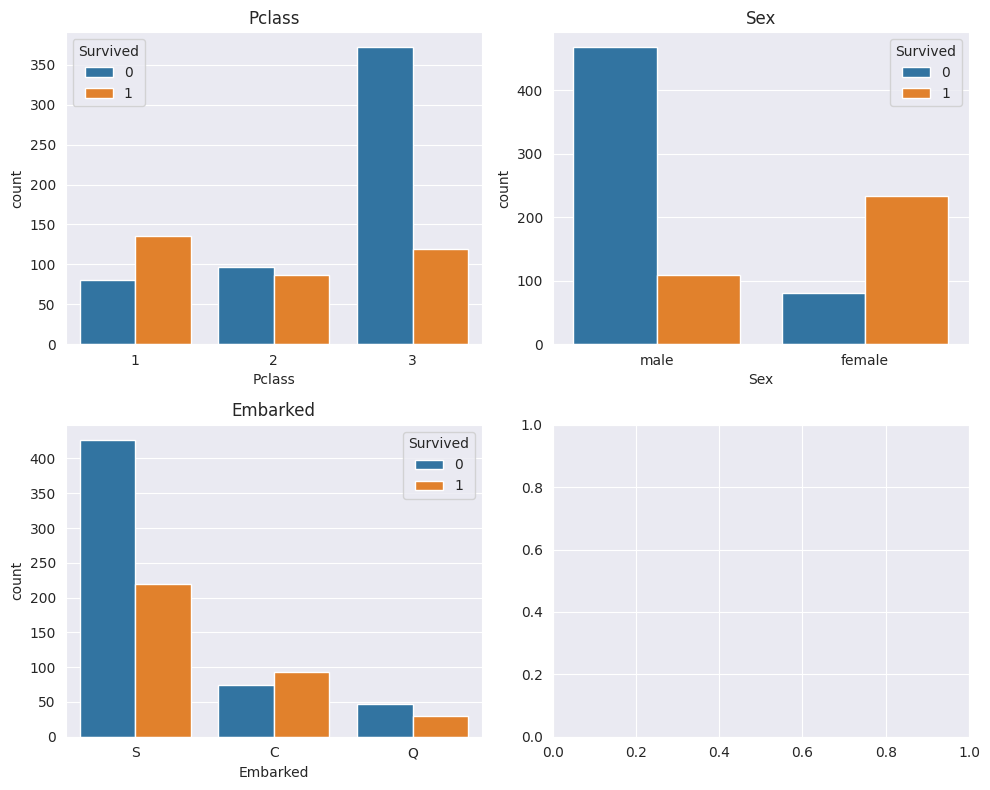

In [64]:
fig,axs=plt.subplots(2,2, figsize=(10,8))
for col,ax in zip(categorical_cols,axs.flatten()):
  ax.set_title(col)
  sns.countplot(data= df, x= col, ax=ax, hue='Survived')

plt.tight_layout()